Test Mean Squared Error (MSE): 0.36
Test R² Score: 0.71


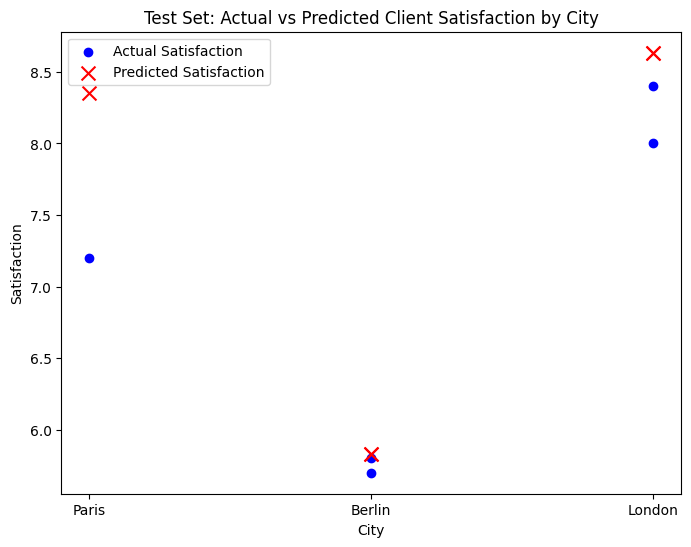

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# ------------------------
# Sample Data
# ------------------------
data = {
    'City': ['Paris', 'Paris', 'Paris', 'Paris', 'Paris',
             'Berlin', 'Berlin', 'Berlin', 'Berlin', 'Berlin',
             'London', 'London', 'London', 'London', 'London'],
    'Actual Satisfaction': [7.2, 8.1, 7.8, 9.0, 8.5,
                            5.8, 5.9, 6.0, 5.6, 5.7,
                            8.2, 8.4, 8.6, 8.0, 9.1]
}

df = pd.DataFrame(data)

# ------------------------
# One-Hot Encoding for 'City'
# ------------------------
encoder = OneHotEncoder(sparse_output=False, drop=None)
city_encoded = encoder.fit_transform(df[['City']])
city_encoded_df = pd.DataFrame(city_encoded, columns=encoder.get_feature_names_out(['City']))

# Combine encoded columns with the original DataFrame
df_encoded = pd.concat([df, city_encoded_df], axis=1)

# ------------------------
# Define Features (X) and Target (y)
# ------------------------
X = df_encoded[encoder.get_feature_names_out(['City'])]
y = df_encoded['Actual Satisfaction']

# ------------------------
# Split Data into Train and Test Sets
# ------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------
# Train Linear Regression Model
# ------------------------
model = LinearRegression()
model.fit(X_train, y_train)

# ------------------------
# Make Predictions on Test Set
# ------------------------
y_pred_test = model.predict(X_test)

# ------------------------
# Evaluate the Model
# ------------------------
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Test Mean Squared Error (MSE): {mse:.2f}")
print(f"Test R² Score: {r2:.2f}")

# ------------------------
# Visualization: Actual vs Predicted Satisfaction on Test Set
# ------------------------
fig, ax = plt.subplots(figsize=(8, 6))

# Plot actual satisfaction scores from test set
for city in df['City'].unique():
    city_indices = X_test.index[df.loc[X_test.index, 'City'] == city]
    ax.scatter([city] * len(city_indices), y_test.loc[city_indices], color='blue', label='Actual Satisfaction' if city == df['City'].unique()[0] else "")

# Plot predicted satisfaction scores from test set
for idx_pos, idx in enumerate(X_test.index):
    city = df.loc[idx, 'City']
    ax.scatter(city, y_pred_test[idx_pos], color='red', marker='x', s=100, label='Predicted Satisfaction' if idx_pos == 0 else "")

ax.set_xlabel("City")
ax.set_ylabel("Satisfaction")
ax.set_title("Test Set: Actual vs Predicted Client Satisfaction by City")
ax.legend()
plt.show()
